## Website Traffic Analysis
This data project has been used as a take-home assignment in the recruitment process for the data science positions at Linkfire.

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

1. [Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
2. [Pandas] What about the other recorded events?
3. [Pandas] Which countries did the pageviews come from?
4. [Pandas] What was the overall click rate (clicks/pageviews)?
5. [Pandas] How does the clickrate distribute across different links?
6. [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.


In [97]:
import pandas as pd
import scipy 
import numpy as np

In [2]:
data = pd.read_csv('traffic.csv')
data.head(5)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [3]:
data.shape

(226278, 9)

### 1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [4]:
data['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

I am using the value_counts() function to print each unique value of the event column. There are 142015 pageviews in total in the event column.

In [5]:
data_question_1 = data[data['event'] == 'pageview'].groupby(by = ['date'])['event'].count()

In [24]:
data_question_1

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

This is the result but also I want to see it without the duplicates.

In [21]:
data_question_1_deduplicated = data.drop_duplicates()
data_question_1_deduplicated.head(3)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd


In [20]:
data_question_1_deduplicated ['event'].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [22]:
data_question_1_deduplicated = data_question_1_deduplicated[data_question_1_deduplicated['event'] == 'pageview'].groupby(by = ['date'])['event'].count()

In [23]:
data_question_1_deduplicated

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

### 2. What about the other recorded events?

In [27]:
data_question_2 = data['event'].value_counts()
data_question_2

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

We can see that 'click' and 'preview' are other recorded events. In other words, we can apply the steps we applied to the 'pageview' event in question 1 for these two variables.

In [31]:
data_question_2_click = data[data['event'] == 'click'].groupby(by= ['date'])['event'].count()
data_question_2_click

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64

In [32]:
data_question_2_preview = data[data['event'] == 'preview'].groupby(by= ['date'])['event'].count()
data_question_2_preview

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64

The 'pageview' event duplicates made a lot of difference. Let's check this in the 'click' and 'preview' events as well.

In [37]:
data_question_2_click_deduplicated = data.drop_duplicates()

In [38]:
data_question_2_click_deduplicated['event'].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [39]:
data_question_2_click_deduplicated = data_question_2_click_deduplicated[data_question_2_click_deduplicated['event'] == 'click'].groupby(by = ['date'])['event'].count()

In [40]:
data_question_2_click_deduplicated

date
2021-08-19    5860
2021-08-20    4999
2021-08-21    4279
2021-08-22    4421
2021-08-23    4314
2021-08-24    4231
2021-08-25    4395
Name: event, dtype: int64

In [41]:
data_question_2_pageview_deduplicated = data.drop_duplicates()

In [42]:
data_question_2_pageview_deduplicated['event'].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [45]:
data_question_2_pageview_deduplicated = data_question_2_pageview_deduplicated[data_question_2_pageview_deduplicated['event'] == 'pageview'].groupby(by = ['date'])['event'].count()

In [47]:
data_question_2_pageview_deduplicated

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

### 3. Which countries did the pageviews come from?

In [52]:
data_question_3 = data[data['event'] == 'pageview']
data_question_3.head(3)

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [56]:
pd.DataFrame(data = data_question_3['country'].dropna().unique(), columns = ['Countries'])

,Countries
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten


### 4. What was the overall click rate (clicks/pageviews)?

In [75]:
clicks = data[data['event'] == 'click'].groupby(by = ['linkid'])['event'].count().reset_index()
clicks.head(3)

,linkid,event
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2


In [80]:
clicks = clicks.rename(columns = {'event' : 'clicks'})
clicks.head(3)

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2


In [73]:
pageviews = data[data['event'] == 'pageview'].groupby(by = ['linkid'])['event'].count().reset_index()
pageviews.head(3)

,linkid,event
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1


In [76]:
pageviews = pageviews.rename(columns = {'event' : 'pageviews'})
pageviews.head(3)

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1


In [81]:
data_question_4 = pd.merge(left = clicks , right = pageviews , on = 'linkid' , how = 'inner')

In [83]:
data_question_4['click_rate'] = data_question_4['clicks'] / data_question_4['pageviews']
data_question_4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


### 5. How does the clickrate distribute across different links?

In [94]:
data_question_5 = data_question_4

In [95]:
data_question_5['click_rate'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

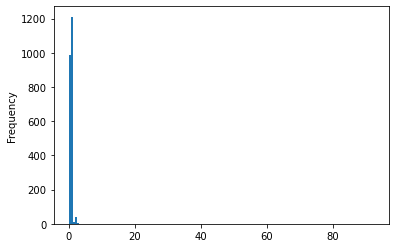

In [108]:
data_question_5['click_rate'].plot(kind = 'hist', bins = 150)

As you can see the data is highly skewed to the left. It means many of its values are very close to zero.  In such cases, a common workaround is to plot the histogram of the logarithm of the data.

In [100]:
data_question_5['click_rate_log'] = np.log2(data_question_5['click_rate'])

<AxesSubplot:ylabel='Frequency'>

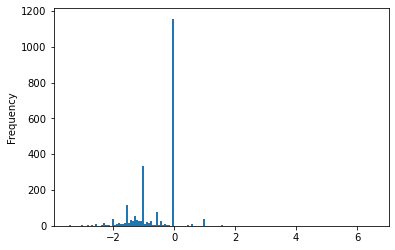

In [109]:
data_question_5['click_rate_log'].plot(kind = 'hist', bins = 150)

We observe an enormous spike at the 0 meaning that the actual click rate was 1, implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero). This plots the logarithm of the actual values, so there is an extra math step in the interpretation here.

<AxesSubplot:>

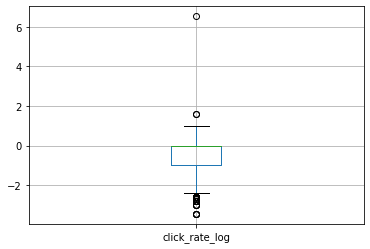

In [110]:
data_question_5.boxplot(column = 'click_rate_log')

I observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.